# **Supervised Machine Learning Algorithms**



## Loading the breast cancer dataset from sklearn datasets.

In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
df=pd.DataFrame(cancer.data,columns =cancer.feature_names)
df["target"]=cancer.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### **Data Preprocessing**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
df.duplicated().sum()

0

### There is no duplicates and null values.

In [ ]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
df_skew = df.skew().sort_values(ascending = False).head(10)
df_skew

,0
area error,5.447186
concavity error,5.110463
fractal dimension error,3.923969
perimeter error,3.443615
radius error,3.088612
smoothness error,2.314450
symmetry error,2.195133
compactness error,1.902221
worst area,1.859373
worst fractal dimension,1.662579


#### Area error and Concavity error are highly positively skewes. Skewness shows  presence of outliers in the dataset.

### **Handling Outliers**

#### Outliers can skew statistical metrics, degrade model performance, violate assumptions, and misrepresent insights. Handling them ensures data quality, reliable analysis, and better model predictions.
#### Outliers are capped with lower bound and upper bound values ensuring data integrity and hence no loss of data.





<Axes: ylabel='area error'>

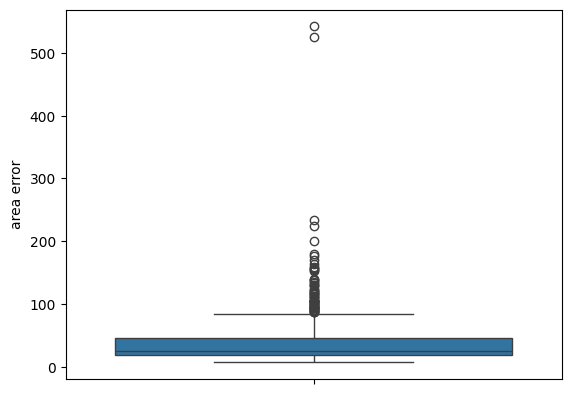

In [ ]:
#plotting box plot for area error column
sns.boxplot(df["area error"])

<Axes: ylabel='area error'>

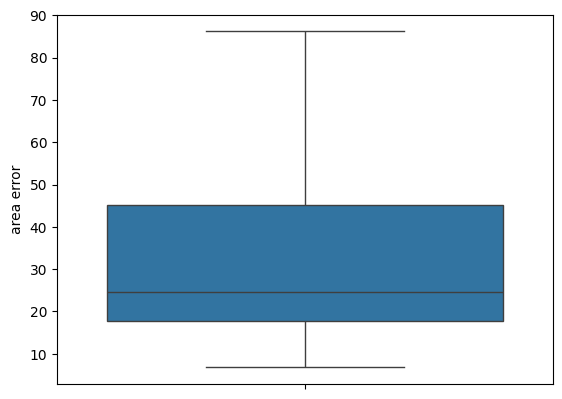

In [ ]:
q1=df["area error"].quantile(0.25)
q3=df["area error"].quantile(0.75)
iqr = q3-q1
lowerbound = q1-(1.5*iqr)
upperbound = q3+(1.5*iqr)
df["area error"] = np.where(df["area error"]<lowerbound,lowerbound,df["area error"])
df["area error"]= np.where(df["area error"]>upperbound,upperbound,df["area error"])

# Plotting after handling outliers.
sns.boxplot(df["area error"])


<Axes: xlabel='concavity error', ylabel='Count'>

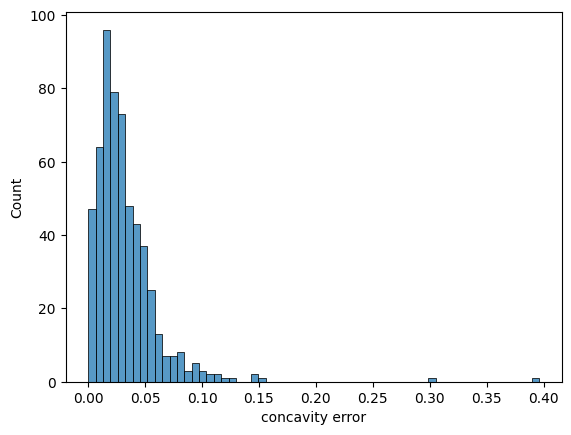

In [ ]:
# Plotting histogram for concave error
sns.histplot(df["concavity error"])

<Axes: xlabel='concavity error', ylabel='Count'>

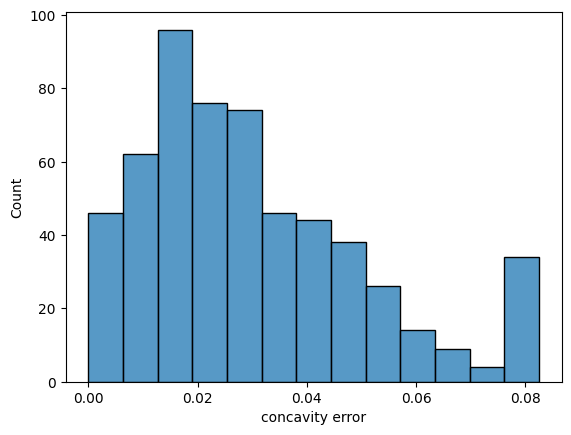

In [ ]:
q1=df["concavity error"].quantile(0.25)
q3=df["concavity error"].quantile(0.75)
iqr = q3-q1
lowerbound = q1-(1.5*iqr)
upperbound = q3+(1.5*iqr)
df["concavity error"] = np.where(df["concavity error"]<lowerbound,lowerbound,df["concavity error"])
df["concavity error"]= np.where(df["concavity error"]>upperbound,upperbound,df["concavity error"])

# Plotting after handling outliers.
sns.histplot(df["concavity error"])


<Axes: ylabel='fractal dimension error'>

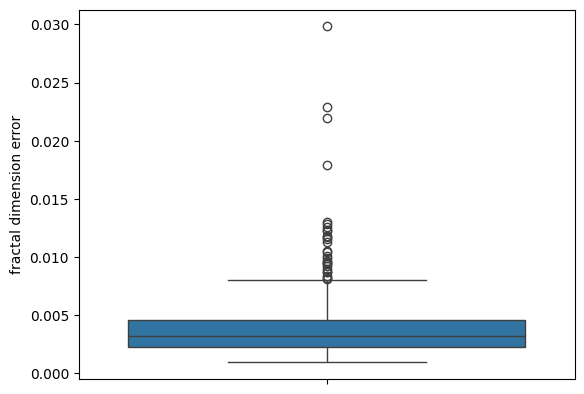

In [ ]:
# Plotting boxplot for fractal dimension error
sns.boxplot(df["fractal dimension error"])

<Axes: ylabel='fractal dimension error'>

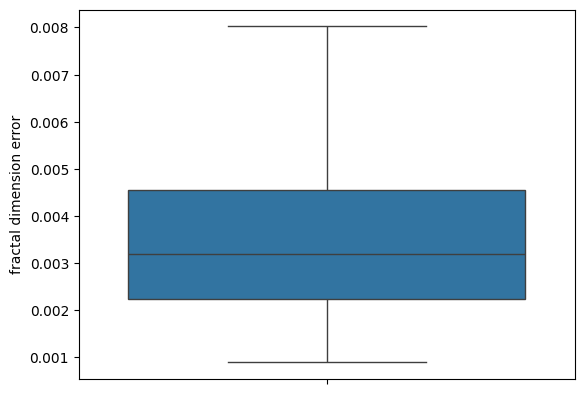

In [ ]:
q1=df["fractal dimension error"].quantile(0.25)
q3=df["fractal dimension error"].quantile(0.75)
iqr = q3-q1
lowerbound = q1-(1.5*iqr)
upperbound = q3+(1.5*iqr)
df["fractal dimension error"] = np.where(df["fractal dimension error"]<lowerbound,lowerbound,df["fractal dimension error"])
df["fractal dimension error"]= np.where(df["fractal dimension error"]>upperbound,upperbound,df["fractal dimension error"])

#Boxplot after handling outliers
sns.boxplot(df["fractal dimension error"])


In [ ]:
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


<Axes: >

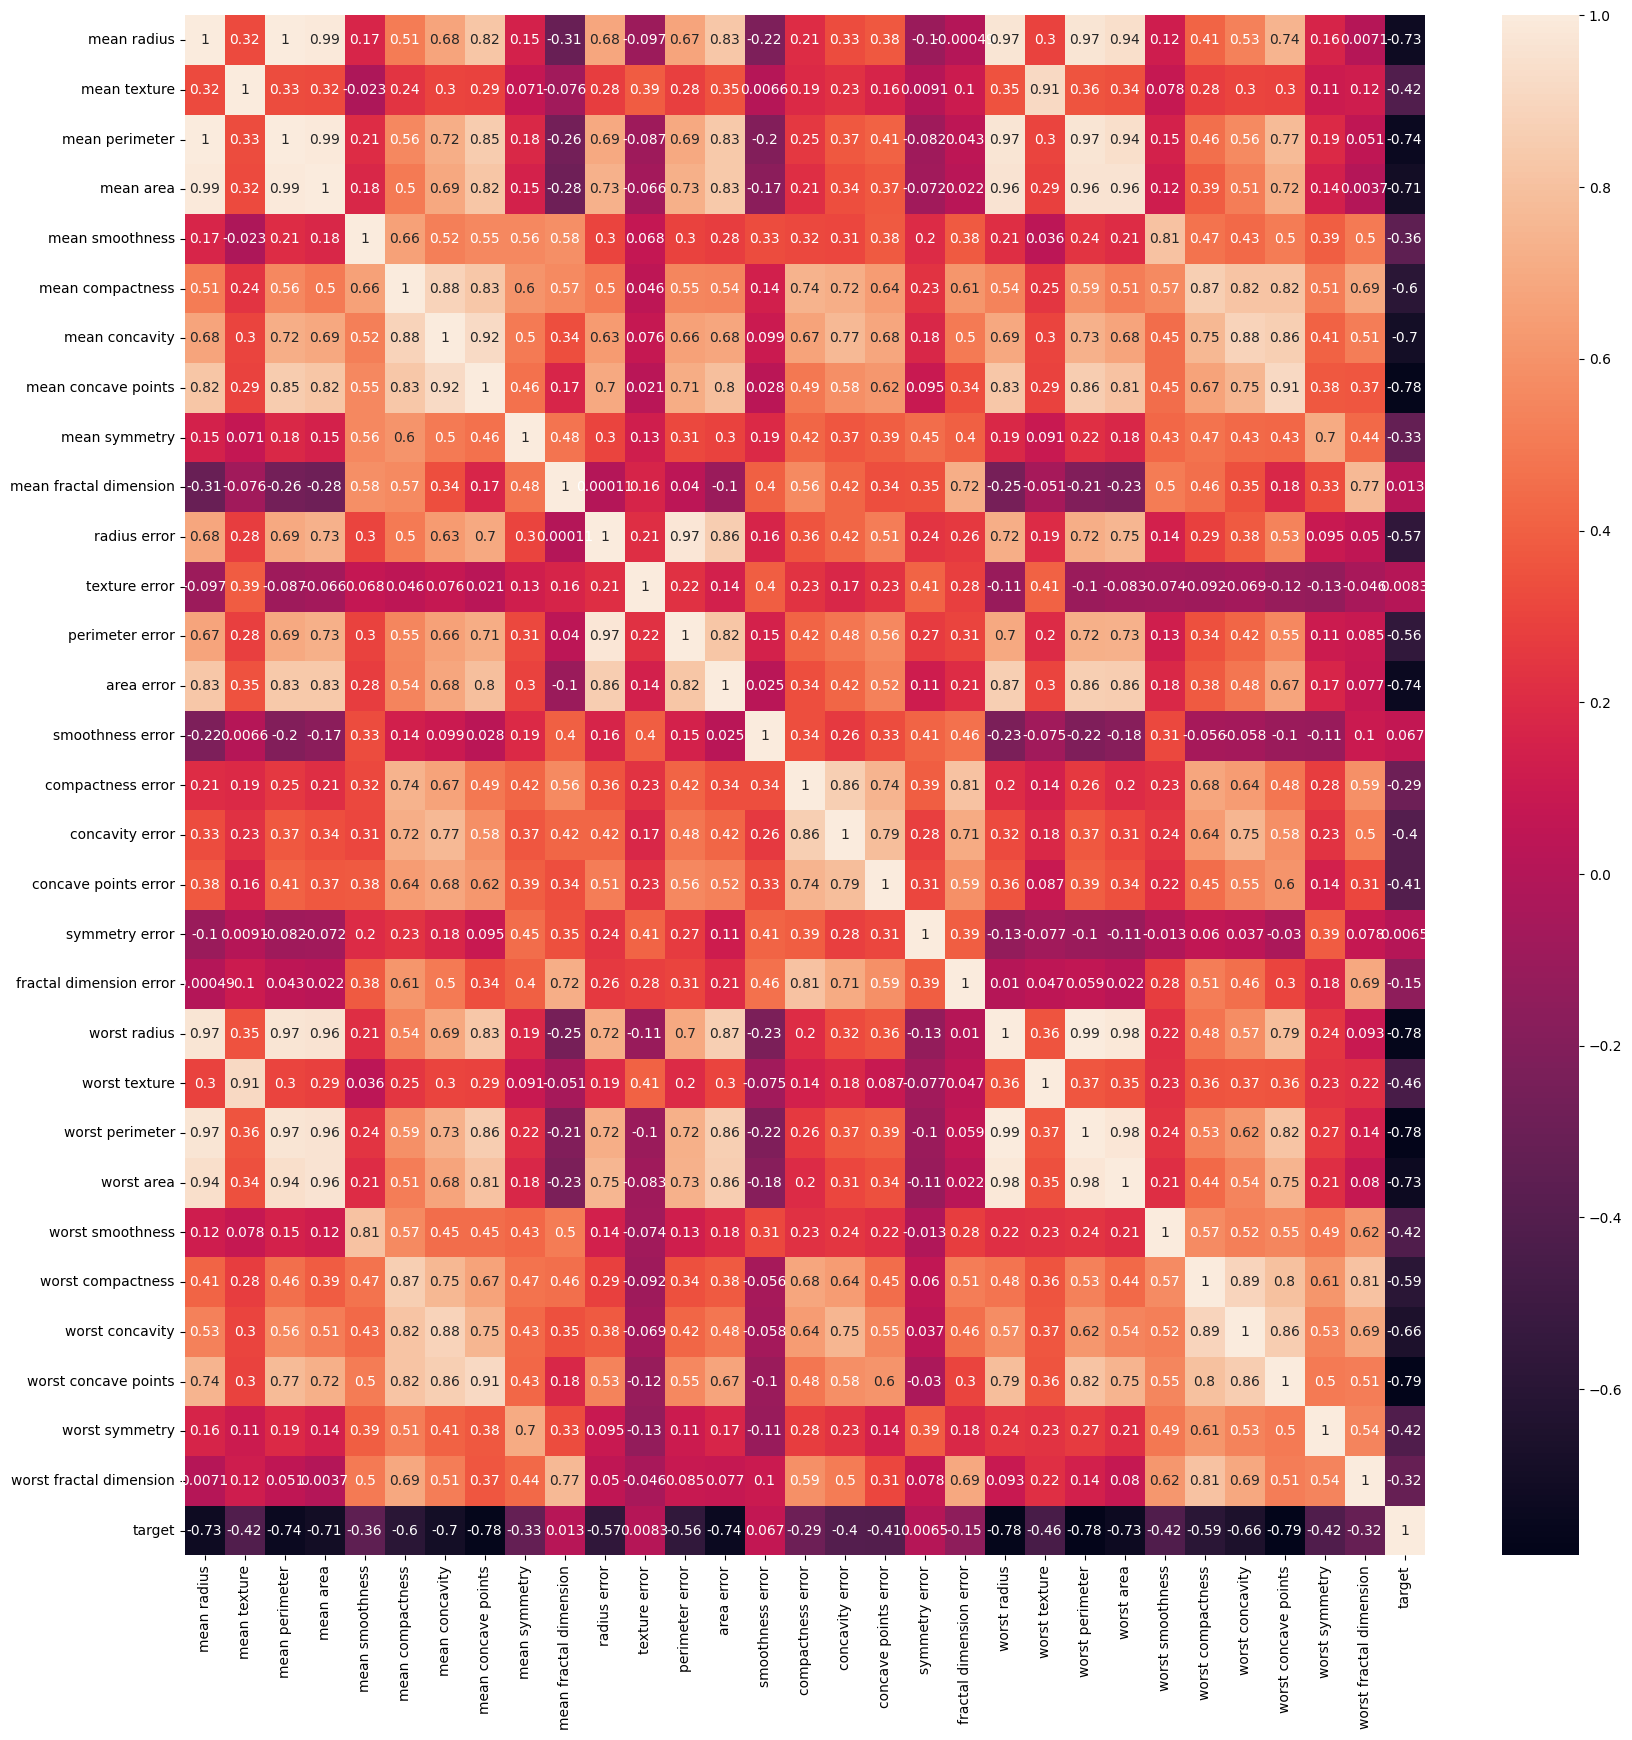

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

#### Target value is negatively correlated with most of the features. some features are highly correlated with each other.

In [ ]:
tar=df["target"].value_counts().reset_index()
tar

,target,count
0,1,357
1,0,212


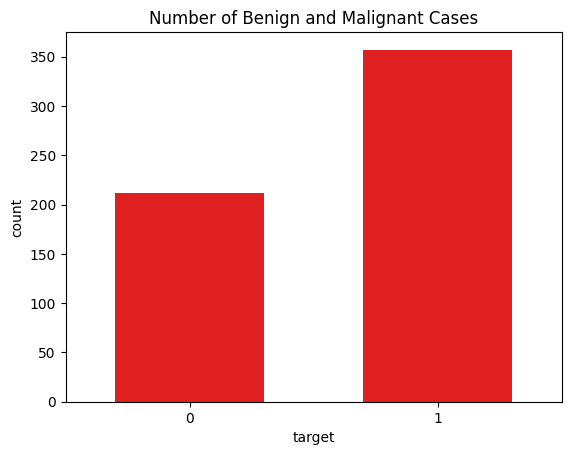

In [ ]:
sns.barplot(tar,x="target",y="count",width=0.6,color="red")
plt.title("Number of Benign and Malignant Cases")
plt.show()



```
# This is formatted as code
```

### **Feature Scaling and Train test Splitting**

### feature scaling is used to standardise the values within a range. Hence all the features are treated fairly improving accuracy and stability.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [ ]:
# Setting features and target for modelling
x=df.drop("target",axis=1)
y=df["target"]

In [ ]:

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
# Splitting x and y for testing
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

## **Classification Algorithms**

### **1.Logistic Regression Model**

#### Logistic regression is used to predict a binary outcome (yes/no, 0/1). It can be used to predict whether a breast tumor is malignant or benign based on features like radius, texture, smoothness, etc.


In [ ]:
# Create and train the model
model_logreg = LogisticRegression()
model_logreg.fit(X_train, y_train)

In [ ]:
# Make predictions
y_pred_log = model_logreg.predict(X_test)

# Evaluate the model
accuracy_logreg = accuracy_score(y_test, y_pred_log)
print("accuracy score ",accuracy_logreg)


## **Decision Tree Classifier**

#### A decision tree splits the data into branches based on feature values, creating a tree-like structure. Each branch represents a decision, and the leaves represent the outcome.The decision tree creates a series of rules based on features that best separate the classes (malignant or benign).

In [ ]:
# Create and train the model
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

In [ ]:
# Make predictions
y_pred_dt = model_dt.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("accuracy score ",accuracy_dt)

## **Random Forest Classifier**

 #### Random Forest is an ensemble method that builds multiple decision trees. It combines their predictions to improve accuracy and reduce overfitting. Each tree is trained on a random subset of the data.


In [ ]:
# Create and Train the model
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

In [ ]:
# make Predictions
y_pred_rf = model_rf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("accuracy score ",accuracy_rf)

## **Support Vector Classifier**



####  SVM tries to find the best boundary (called a hyperplane) that separates data points of different classes. It maximizes the margin (distance) between the classes to ensure the best separation.In this case ,creates a boundary that separates malignant tumors from benign ones, using the features like radius, texture, etc.


In [ ]:
# Create and train the model
from sklearn.svm import SVC
model_svc = SVC()
model_svc.fit(X_train, y_train)

In [ ]:
# Make predictions
y_pred_svc = model_svc.predict(X_test)

# Evaluate the model
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print("accuracy score ",accuracy_svc)

## **k Nearest Neighbours**

####KNN classifies data points based on the majority class of the nearest K data points.KNN can be used to classify a tumor as malignant or benign based on the closest neighbors in the feature space.

In [ ]:
# Create and train the model
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

In [ ]:
# Make predictions
y_pred_knn = model_knn.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("accuracy score ",accuracy_knn)

## **Model Comparison**

In [ ]:
# Creating a list of models and their predictions.

models = ['Logistic Regression', 'Dense tree Classifier',
          'Random Forest Classifier', 'SVC', 'kNN']
y_predictions = [y_pred_log, y_pred_dt, y_pred_rf, y_pred_svc, y_pred_knn]

# Created an empty list.
metrics=[]

# Using for loop, created a table with models and their evaluation metrics.
for i in range(len(models)):
    model = models[i]
    y_pred = y_predictions[i]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="binary")
    recall = recall_score(y_test, y_pred, average="binary")
    f1 = f1_score(y_test, y_pred, average="binary")

    metrics.append({
        "model": model,
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1})

# Converted metrics to a dataframe
metrics_df = pd.DataFrame(metrics)
metrics_df.sort_values("accuracy",ascending=False)



,model,accuracy,precision,recall,f1_score
0,Logistic Regression,0.982456,0.985915,0.985915,0.985915
3,SVC,0.973684,0.972222,0.985915,0.979021
2,Random Forest Classifier,0.964912,0.958904,0.985915,0.972222
4,kNN,0.956140,0.958333,0.971831,0.965035
1,Dense tree Classifier,0.929825,0.943662,0.943662,0.943662


#### The best model is logistic regression with 0.98 accuracy and f1 score. The least accurate model is dense tree classifier.

#### After preprocessing the data and capping outliers, Logistic Regression emerged as the best-performing model for classifying breast cancer as malignant or benign. This result can be attributed to the following factors:

#### 1.The binary nature of the target variable aligns well with Logistic Regression's probabilistic approach.

####2.Outlier capping minimized the influence of extreme values, improving the linear decision boundary.

#### 3.Regularization helped mitigate overfitting and improved model robustness.

#### 4. Dataset is also small in size.